In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

## Loading the IRIS dataset

In [2]:
iris = datasets.load_iris()

X = iris.data[:,:2]
y = iris.target
features = iris.feature_names[:2]

In [3]:
features

['sepal length (cm)', 'sepal width (cm)']

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 28)

print(X_train.shape)
print(X_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)

(105,)
(45,)


## Creating 11 base models from Bootstrapped data

In [5]:
model_list = []

from sklearn.tree import DecisionTreeClassifier

for _ in range(11):
    clf = DecisionTreeClassifier(max_depth=3)
    
    random_row_indices = np.random.choice(105, size=50, replace=False)
    random_inp = X_train[random_row_indices]
    random_op = y_train[random_row_indices]
    
    clf.fit(random_inp,random_op)
    model_list.append(clf)

In [6]:
model_list

[DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3),
 DecisionTreeClassifier(max_depth=3)]

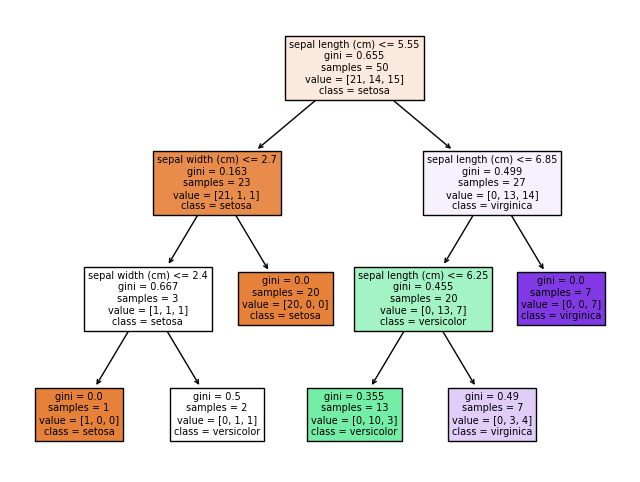

----------------------------------------------------------------------------------------------------


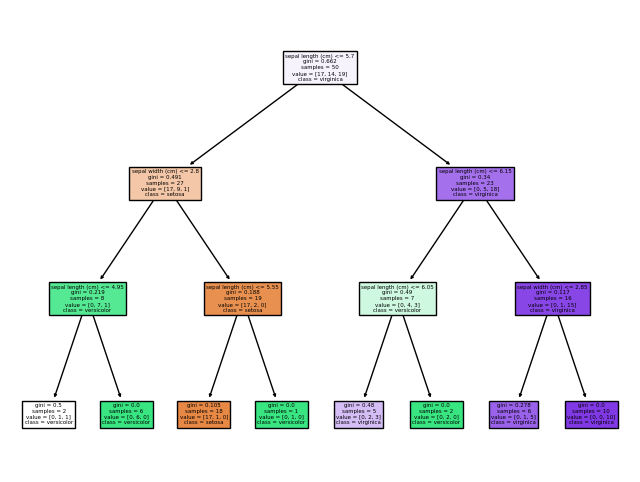

----------------------------------------------------------------------------------------------------


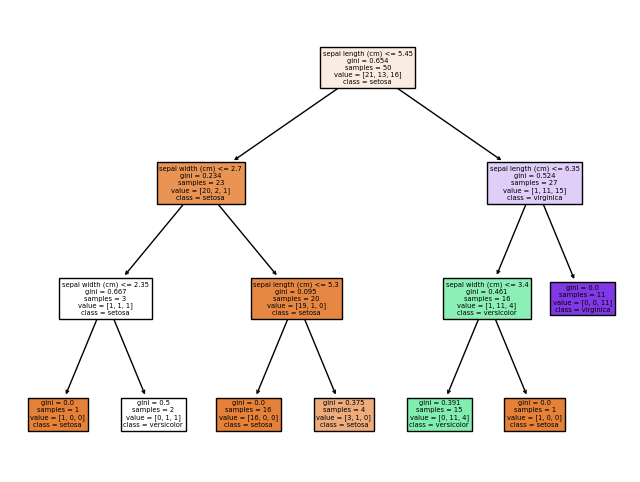

----------------------------------------------------------------------------------------------------


In [7]:
from sklearn.tree import plot_tree

# Showing 4 of the 10 base models
for model in model_list[:3]:
    plt.figure(figsize=(8,6))
    plot_tree(model,feature_names=features,class_names = list(iris.target_names),filled=True)
    plt.show()
    print('--'*50)

### As we can see each model is slightly different from the rest

## Plotting Decision Boundary

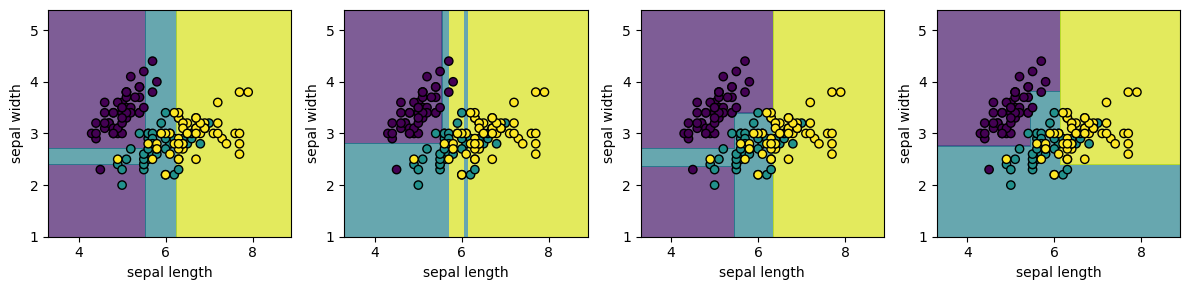

In [8]:
# Create a figure and an array of subplots with 1 row and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(12, 3))  # Adjust figsize as needed

for i,model in enumerate(model_list[:4]):
    
    x_min,x_max = X[:,0].min() - 1 , X[:,0].max() + 1
    y_min,y_max = X[:,1].min() - 1 , X[:,1].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

    z = model.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)

    axs[i].contourf(xx,yy,z,alpha = 0.7)
    axs[i].scatter(X[:,0], X[:,1],c = y,edgecolor = 'k')
    axs[i].set_xlabel('sepal length')
    axs[i].set_ylabel('sepal width')
    
# # Adjust layout
plt.tight_layout()

# # Show the plots
plt.show()    

### Here we have plotted decision boundaries of 4 out of the 10 models to show how they vary

## Model Evaluation

In [9]:
from sklearn.metrics import accuracy_score,classification_report

accuracy_list = []
ypred_list = []
for model in model_list:
    accuracy = accuracy_score(y_test,model.predict(X_test))
    accuracy_list.append(accuracy)
    ypred_list.append(model.predict(X_test))

In [10]:
accuracy_list

[0.6666666666666666,
 0.6666666666666666,
 0.7111111111111111,
 0.7333333333333333,
 0.5777777777777777,
 0.5777777777777777,
 0.6888888888888889,
 0.7333333333333333,
 0.7111111111111111,
 0.6888888888888889,
 0.5111111111111111]

In [11]:
prediction_arr = np.vstack(ypred_list).T

In [12]:
prediction_arr[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2],
       [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [13]:
from statistics import mode
for i in prediction_arr[:5]:
    print(mode(i))

0
1
1
0
1


## Majority Voting from each of the models

In [14]:
from statistics import mode

y_pred = []
for i in prediction_arr:
    y_pred.append(mode(i))

In [15]:
accuracy_score(y_test,y_pred)

0.7333333333333333

In [16]:
print(np.round(accuracy_list,3))

[0.667 0.667 0.711 0.733 0.578 0.578 0.689 0.733 0.711 0.689 0.511]


### So, we can see that the Ensemble Voting gives better performance than each of the base models